In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("preprocessed.csv")
df = df.drop(columns = ["Unnamed: 0"])
df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,34.0,11,1,2,0,934.0,0,1,1,18,10,704,2.0,1,3,0
1,41.0,11,1,1,0,1352.0,1,0,1,13,4,893,2.0,0,0,0
2,57.0,11,1,1,0,495.0,0,0,1,18,7,796,4.0,0,0,1
3,37.0,10,1,3,0,650.0,1,0,0,26,4,880,1.0,0,0,0
4,29.0,9,1,2,0,265.0,1,0,1,19,7,795,2.0,0,0,0


In [5]:
df.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [6]:
df["having_loan"] = df["housing_loan"] + df["personal_loan"]
df.groupby(["having_loan","term_deposit_subscribed"]).count()

customer_age  job_type  marital  \
having_loan term_deposit_subscribed                                    
0           0                                7479      7479     7479   
            1                               12992     12992    12992   
1           0                               11715     11715    11715   
            1                                7326      7326     7326   
2           0                                2150      2150     2150   
            1                                1026      1026     1026   

                                     education  default  balance  \
having_loan term_deposit_subscribed                                
0           0                             7479     7479     7479   
            1                            12992    12992    12992   
1           0                            11715    11715    11715   
            1                             7326     7326     7326   
2           0                             2150     2150     2150   
            1                             1026     1026     1026   

                                     housing_loan  personal_loan  \
having_loan term_deposit_subscribed                                
0           0                                7479           7479   
            1                               12992          12992   
1           0                               11715          11715   
            1                                7326           7326   
2           0                                2150           2150   
            1                                1026           1026   

                                     communication_type  day_of_month  month  \
having_loan term_deposit_subscribed                                            
0           0                                      7479          7479   7479   
            1                                     12992         12992  12992   
1           0                                     11715         11715  11715   
            1                                      7326          7326   7326   
2           0                                      2150          2150   2150   
            1                                      1026          1026   1026   

                                     last_contact_duration  \
having_loan term_deposit_subscribed                          
0           0                                         7479   
            1                                        12992   
1           0                                        11715   
            1                                         7326   
2           0                                         2150   
            1                                         1026   

                                     num_contacts_in_campaign  \
having_loan term_deposit_subscribed                             
0           0                                            7479   
            1                                           12992   
1           0                                           11715   
            1                                            7326   
2           0                                            2150   
            1                                            1026   

                                     num_contacts_prev_campaign  \
having_loan term_deposit_subscribed                               
0           0                                              7479   
            1                                             12992   
1           0                                             11715   
            1                                              7326   
2           0                                              2150   
            1                                              1026   

                                     prev_campaign_outcome  
having_loan term_deposit_subscribed                         
0           0                                       

In [7]:
df.drop(columns = ['housing_loan', 'personal_loan'],inplace = True)

In [8]:
df.groupby(["month","term_deposit_subscribed"])["day_of_month"].count()

month  term_deposit_subscribed
0      0                           663
       1                           561
1      0                          1169
       1                          1776
2      0                           126
       1                          1217
3      0                          1301
       1                          2287
4      0                          6902
       1                          3649
5      0                          2545
       1                          2208
6      0                          3334
       1                          2348
7      0                          2945
       1                          2597
8      0                           164
       1                          1270
9      0                           223
       1                          1374
10     0                          1909
       1                          1660
11     0                            63
       1                           397
Name: day_of_month, dtype: int64

In [9]:
df.groupby(["day_of_month","term_deposit_subscribed"])["month"].count()

day_of_month  term_deposit_subscribed
1             0                           134
              1                           399
2             0                           557
              1                           792
3             0                           495
                                         ... 
29            1                           563
30            0                           686
              1                          1249
31            0                           334
              1                           218
Name: month, Length: 62, dtype: int64

In [10]:
df[['day_of_month', 'month', 'last_contact_duration','term_deposit_subscribed']]

,day_of_month,month,last_contact_duration,term_deposit_subscribed
0,18,10,704,0
1,13,4,893,0
2,18,7,796,1
3,26,4,880,0
4,19,7,795,0
...,...,...,...,...
42683,31,9,722,1
42684,9,6,836,1
42685,12,1,983,1
42686,11,5,864,1


## Features Selection

##### Checking The Information Gain for the features

IG calculates the importance of each feature by measuring the increase in entropy when the feature is given vs. absent. Algorithm: IG(S, a) = H(S) — H(S | a) Where IG(S, a) is the information for the dataset S for the variable a for a random variable, H(S) is the entropy for the dataset before any change (described above) and H(S | a) is the conditional entropy for the dataset in the presence of variable a.


In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

def FeatureInfoGain(X, y):
    bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all') # k is number of features you want to select
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']
    return featureScores

In [12]:
X = df[[x for x in df.columns.to_list() if x != 'term_deposit_subscribed']]
y = df['term_deposit_subscribed']

featureScores = FeatureInfoGain(X, y)
featureScores

,Specs,Score
0,customer_age,0.027288
1,job_type,0.022963
2,marital,0.004152
3,education,0.010279
4,default,0.002898
5,balance,0.220462
6,communication_type,0.043398
7,day_of_month,0.017249
8,month,0.054619
9,last_contact_duration,0.128404


In [13]:
featureScores.sort_values(by = "Score",ascending=False)

,Specs,Score
5,balance,0.220462
9,last_contact_duration,0.128404
12,prev_campaign_outcome,0.064259
8,month,0.054619
6,communication_type,0.043398
13,having_loan,0.039398
11,num_contacts_prev_campaign,0.039099
0,customer_age,0.027288
1,job_type,0.022963
7,day_of_month,0.017249


##### Observation :- As we see Information gain for all features are very less.

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42688 entries, 0 to 42687
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                42688 non-null  float64
 1   job_type                    42688 non-null  int64  
 2   marital                     42688 non-null  int64  
 3   education                   42688 non-null  int64  
 4   default                     42688 non-null  int64  
 5   balance                     42688 non-null  float64
 6   communication_type          42688 non-null  int64  
 7   day_of_month                42688 non-null  int64  
 8   month                       42688 non-null  int64  
 9   last_contact_duration       42688 non-null  int64  
 10  num_contacts_in_campaign    42688 non-null  float64
 11  num_contacts_prev_campaign  42688 non-null  int64  
 12  prev_campaign_outcome       42688 non-null  int64  
 13  having_loan                 426

##### correlation method for feature selection

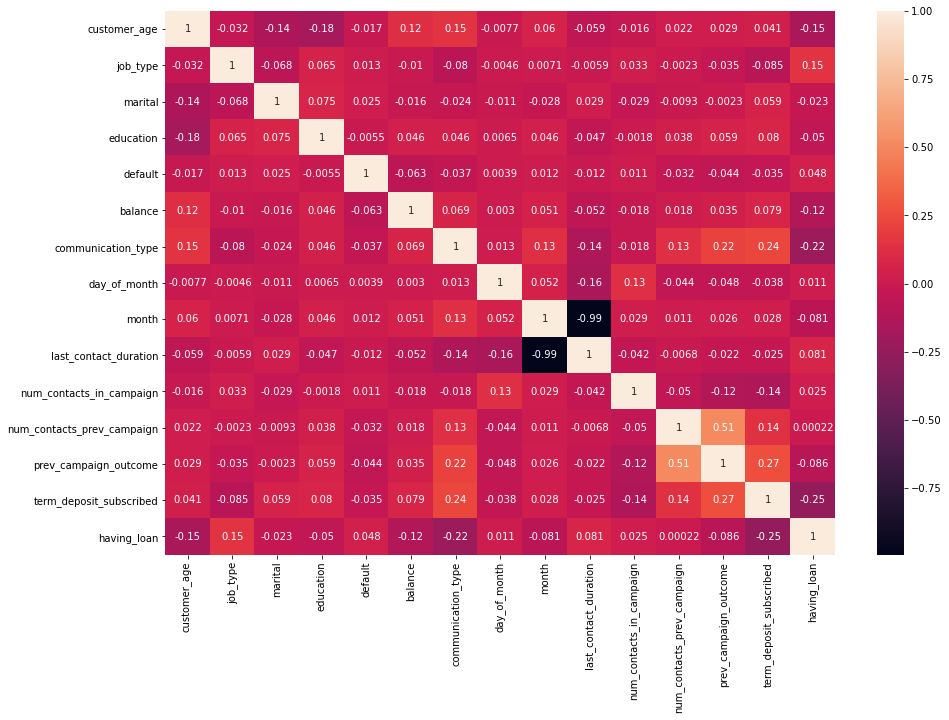

In [15]:
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(data = df.corr(), annot=True)

In [16]:
#correlation value of 'term_deposit_subscribed' column with other columns
df.corr()['term_deposit_subscribed'][:-1].sort_values(ascending=False)

term_deposit_subscribed       1.000000
prev_campaign_outcome         0.265503
communication_type            0.235835
num_contacts_prev_campaign    0.139501
education                     0.080165
balance                       0.078713
marital                       0.059094
customer_age                  0.041220
month                         0.027998
last_contact_duration        -0.024608
default                      -0.034966
day_of_month                 -0.037912
job_type                     -0.085043
num_contacts_in_campaign     -0.137080
Name: term_deposit_subscribed, dtype: float64

##### ExtraTreesClassifier method

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

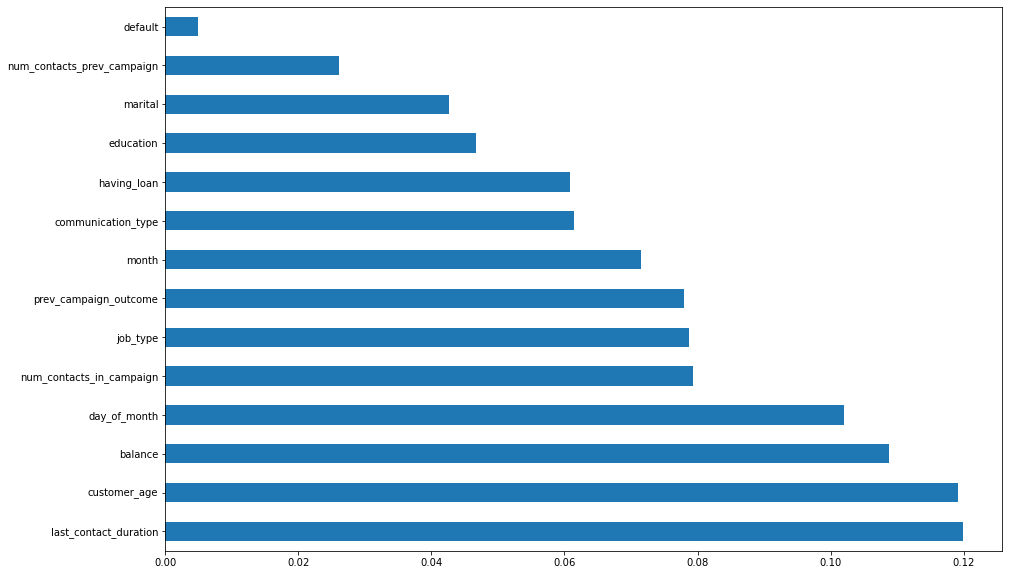

In [18]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize = (15,10))
feat_importances.nlargest(15).plot(kind="barh")
plt.show()

In [19]:
feat_importances

customer_age                  0.119186
job_type                      0.078668
marital                       0.042681
education                     0.046726
default                       0.004901
balance                       0.108826
communication_type            0.061496
day_of_month                  0.102023
month                         0.071449
last_contact_duration         0.119858
num_contacts_in_campaign      0.079321
num_contacts_prev_campaign    0.026160
prev_campaign_outcome         0.077895
having_loan                   0.060809
dtype: float64

##### Observation :- 

1) As we see Information gain of "education","day_of_month","marital","default" are almost zero(0) that means this features does not play important role in Predicating "term_deposit_subscribed"  feature information.

2) As we see "last_contact_duration" and "month" features are highly negative correlate with each other.


## Spliting Data into independent and dependent feature

In [20]:
data = df[["customer_age","job_type","balance","having_loan","last_contact_duration","prev_campaign_outcome","num_contacts_in_campaign","num_contacts_prev_campaign"]]

In [21]:
data.head()

,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign
0,34.0,11,934.0,1,704,3,2.0,1
1,41.0,11,1352.0,1,893,0,2.0,0
2,57.0,11,495.0,0,796,0,4.0,0
3,37.0,10,650.0,1,880,0,1.0,0
4,29.0,9,265.0,1,795,0,2.0,0


In [22]:
target = df["term_deposit_subscribed"]
target

0        0
1        0
2        1
3        0
4        0
        ..
42683    1
42684    1
42685    1
42686    1
42687    1
Name: term_deposit_subscribed, Length: 42688, dtype: int64

## Standardization

In [23]:
from sklearn.preprocessing import RobustScaler

In [24]:
rb = RobustScaler()
train_Scaled = rb.fit_transform(data)

## Spliting data into train and test data

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_Scaled, target, test_size=0.3, random_state=7)

In [26]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((29881, 8), (12807, 8), (29881,), (12807,))

## Model Selection

In [27]:
try:
    from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
    from sklearn.model_selection import cross_validate 
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import LinearSVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from xgboost import XGBClassifier
except Exception as e:
    raise str(e)

In [28]:
class EvalModel:
    def __init__(self, x=None, y=None, fold=5):
        self._x = x
        self._y = y
        self._fold = fold 
        self._clstree = {'logreg': LogisticRegression, 'svm': LinearSVC,'dsctree': DecisionTreeClassifier, 'rndfclf': RandomForestClassifier,'adabst': AdaBoostClassifier, 'nvbys': GaussianNB,'knn': KNeighborsClassifier, 'xgbst': XGBClassifier}
        self._scoring = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1_score':make_scorer(f1_score)}
    
    @staticmethod
    def _has_classifier():
        return ['logreg', 'svm', 'dsctree', 'rndfclf', 'nvbys', 'adabst', 'knn', 'xgbst']

    def _has_classifier_names(self, name):
        return {
            'logreg': 'Logistic Regression',
            'svm': 'Support Vector Classifier',
            'dsctree': 'Decision Tree',
            'rndfclf':'Random Forest',
            'nvbys':'Gaussian Naive Bayes',
            'adabst': 'AdaBoost Classifier',
            'knn': 'KNearest Classifier',
            'xgbst': 'XGBoost Classifier'
        }.get(name)

    def _perform_validate(self,nmdl=[]):
        models_scores_table = {}
        try:
            for x in nmdl:
                if x not in self._has_classifier():
                    return "{x} - key of Classifier Not Available. so please execute _has_classifier_names() method to see available classifiers".format(x=x)
                validated_obj = self._cross_validate(self._clstree.get(x)())
                models_scores_table.update({
                    self._has_classifier_names(x) : [
                                            validated_obj['test_accuracy'].mean(),
                                            validated_obj['test_precision'].mean(),
                                            validated_obj['test_recall'].mean(),
                                            validated_obj['test_f1_score'].mean()                
                                        ]
                    })
            models_scores_table = pd.DataFrame(models_scores_table, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
                #Add 'Best Score' column
            models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
            # Return models performance metrics scores data frame
            return models_scores_table
        except Exception as e:
            raise str(e)

    def _cross_validate(self, model):
        return cross_validate(model, self._x, self._y, scoring=self._scoring, cv=self._fold)

In [29]:
EvalModel(x_train, y_train, 10)._perform_validate(['logreg', 'svm', 'dsctree', 'rndfclf', 'nvbys', 'adabst', 'knn', 'xgbst'])

[16:47:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,AdaBoost Classifier,KNearest Classifier,XGBoost Classifier,Best Score
Accuracy,0.661089,0.662093,0.938924,0.969981,0.661825,0.718383,0.843914,0.856999,Random Forest
Precision,0.654513,0.656165,0.893442,0.946562,0.667258,0.761148,0.778902,0.869749,Random Forest
Recall,0.680362,0.679088,0.996582,0.996180,0.646582,0.635322,0.960188,0.839410,Decision Tree
F1 Score,0.667152,0.667398,0.942187,0.970721,0.655329,0.692483,0.860044,0.854246,Random Forest


In [30]:
import pickle

In [31]:
#saving the RobustScaler to the local file system
filename = 'finalized_scalar_2.pickle'
pickle.dump(rb, open(filename, 'wb'))

## Hyper Parameter Tunning for RandomForestClassifier 

In [33]:
rand = RandomForestClassifier()

In [34]:
rand.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
y_pred = rand.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[6080,  303],
       [   4, 6420]], dtype=int64)

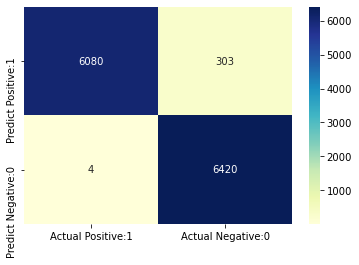

In [37]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [38]:
#saving the model to the local file system
filename = 'randomforest.pickle'
pickle.dump(rand, open(filename, 'wb'))

In [39]:
Data = pd.read_csv("prediction_data.csv")
Data = Data.drop(columns = ["Unnamed: 0"])
Data.head()

,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign
0,28.0,10,285.0,1,849,0,4.0,0
1,46.0,9,656.0,0,990,0,4.0,0
2,34.0,8,2.0,1,886,0,3.0,0
3,65.0,7,2880.0,0,913,0,1.0,0
4,52.0,11,1779.0,0,703,1,3.0,1


In [40]:
Df = Data.values
Df

array([[2.80000000e+01, 1.00000000e+01, 2.85000000e+02, ...,
        0.00000000e+00, 4.00000000e+00, 0.00000000e+00],
       [4.60000000e+01, 9.00000000e+00, 6.56000000e+02, ...,
        0.00000000e+00, 4.00000000e+00, 0.00000000e+00],
       [3.40000000e+01, 8.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       ...,
       [5.60000000e+01, 5.00000000e+00, 2.27000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.80000000e+01, 6.00000000e+00, 1.38091445e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.60000000e+01, 9.00000000e+00, 4.59000000e+02, ...,
        3.00000000e+00, 1.00000000e+00, 8.00000000e+00]])

In [41]:
import pickle
model = pickle.load(open("randomforest.pickle","rb"))
scalar = pickle.load(open("finalized_scalar_2.pickle","rb"))

In [42]:
rand_lt = []
for i in range(len(Df)):
    scaled_data = scalar.transform([Df[i]])
    prediction = model.predict(scaled_data)
    rand_lt.append(prediction)
    print(prediction)

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [43]:
pred_data = pd.DataFrame(rand_lt,columns = ["Predication"])
pred_data

,Predication
0,0
1,0
2,0
3,0
4,0
...,...
7762,0
7763,0
7764,0
7765,0


In [44]:
df = pd.read_excel("New_customer_list_data.xlsx")
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


In [45]:
result = pd.concat([df["customer_id"],Data,pred_data],axis = 1)
result

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
0,id_43823,28.0,10,285.000000,1,849,0,4.0,0,0
1,id_10523,46.0,9,656.000000,0,990,0,4.0,0,0
2,id_43951,34.0,8,2.000000,1,886,0,3.0,0,0
3,id_12681,65.0,7,2880.000000,0,913,0,1.0,0,0
4,id_2153,52.0,11,1779.000000,0,703,1,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...
7762,id_29917,52.0,9,1764.000000,1,863,0,2.0,0,0
7763,id_9275,50.0,10,401.000000,0,843,1,1.0,6,0
7764,id_16678,56.0,5,227.000000,1,705,0,1.0,0,0
7765,id_26369,28.0,6,1380.914454,1,879,0,1.0,0,0


In [46]:
final_data = result[result["Predication"] == 1]
final_data.head()

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
50,id_42906,36.0,9,2200.0,0,924,0,1.0,0,1
53,id_3135,34.0,2,1356.0,1,892,2,1.0,2,1
54,id_39196,26.0,8,451.0,0,917,0,2.0,0,1
64,id_12380,44.0,11,7890.0,1,991,0,1.0,0,1
74,id_32074,76.0,7,2656.0,0,712,0,5.0,0,1


In [47]:
final_data.shape

(677, 10)

In [49]:
df1 = pd.read_csv("Union_dataset_all_three_model.csv")
df1 = df1.drop(columns = ["Unnamed: 0"])
df1

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
0,id_1895,33.0,9,804.0,0,826,2,3.0,1,1
1,id_33092,46.0,11,637.0,1,955,2,1.0,4,1
2,id_45113,62.0,7,5267.0,0,984,0,3.0,0,1
3,id_12016,37.0,10,2645.0,0,740,2,1.0,1,1
4,id_6592,29.0,8,339.0,0,689,2,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...
338,id_500,33.0,10,2671.0,1,703,2,1.0,2,1
339,id_7108,24.0,4,432.0,0,795,2,11.0,5,1
340,id_11877,69.0,7,453.0,0,962,0,1.0,0,1
341,id_28251,66.0,7,313.0,0,978,0,1.0,0,1


In [50]:
union = pd.concat([df1,final_data],ignore_index=True).drop_duplicates()
union.head()

,customer_id,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign,Predication
0,id_1895,33.0,9,804.0,0,826,2,3.0,1,1
1,id_33092,46.0,11,637.0,1,955,2,1.0,4,1
2,id_45113,62.0,7,5267.0,0,984,0,3.0,0,1
3,id_12016,37.0,10,2645.0,0,740,2,1.0,1,1
4,id_6592,29.0,8,339.0,0,689,2,1.0,1,1


In [51]:
union.shape

(727, 10)

In [52]:
union.to_csv("data_1.csv")